# Optimizing Game Environments: A Comprehensive Study of AI Pathfinding Techniques

### Domain : Games
### Description:
In this coursework, we delve into the fascinating realm of AI pathfinding within the domain of video games. Navigating characters efficiently through dynamic and obstacle-laden game environments is a crucial aspect of creating immersive gaming experiences. We explore three distinct AI pathfinding techniques, analyzing their strengths, weaknesses, and applicability in gaming scenarios. Our selected techniques include traditional A* algorithms, machine learning-based approaches, and heuristic-based optimizations. By comparing and evaluating these techniques, we aim to uncover the most effective strategies for game developers to enhance player experiences. The study also addresses the specific input data requirements and expected output outcomes associated with each technique. Join us on this exploration of AI-driven pathfinding, where strategic decisions and innovative solutions shape the virtual landscapes of tomorrow's gaming worlds. (thanks GPT)


# Implementation

This cell includes the import statements for the required libraries: matplotlib for plotting, numpy for numerical operations, and heapq for the priority queue used in the A* algorithm. random is imported for generating random obstacle positions.

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from heapq import heappop, heappush
import random


This cell defines the A* pathfinding algorithm with helper functions: neighbors, heuristic, and reconstruct_path. The A* algorithm is used to find the optimal path from the start point to the goal on a grid with obstacles.

In [2]:
# Define the A* pathfinding algorithm with least steps priority
def astar_least_steps(start, goal, grid):
    rows, cols = len(grid), len(grid[0])
    open_set = [(0, start)]
    came_from = {}
    cost_so_far = {start: 0}
    all_paths = []  # Track all paths explored
    path = []  # Initialize the path variable

    while open_set:
        current_cost, current_node = heappop(open_set)

        for neighbor in neighbors(current_node, rows, cols, grid):
            new_cost = cost_so_far[current_node] + 1  # Each step has a cost of 1

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = len(path)  # Prioritize fewer steps
                heappush(open_set, (priority, neighbor))
                came_from[neighbor] = current_node
                path = reconstruct_path(came_from, start, neighbor)  # Update the path

        if current_node == goal:
            # Store the full path
            path = reconstruct_path(came_from, start, goal)
            all_paths.append(path)

    if all_paths:
        # Find the shortest path among all explored paths
        shortest_path = min(all_paths, key=len)
        print(f"Number of steps: {len(shortest_path) - 1}")  # Subtract 1 to get the number of steps
        return shortest_path, all_paths
    else:
        print("No path found.")
        return [], all_paths



In [4]:
# Define the A* pathfinding algorithm with weights
def astar(start, goal, grid):
    rows, cols = len(grid), len(grid[0])
    open_set = [(0, start)]
    came_from = {}
    cost_so_far = {start: 0}
    weights_along_path = {start: [grid[start[0], start[1]]]}  # Track weights along the path
    all_paths = []  # Track all paths explored
    steps = 0  # Counter for steps taken

    while open_set:
        current_cost, current_node = heappop(open_set)

        if current_node == goal:
            # Store the full path
            path = reconstruct_path(came_from, start, goal)
            all_paths.append(path)

            # Print weights along the path before returning
            total_cost = sum(random_numbers[node[0], node[1]] for node in path)  # Calculate total cost
            weights_str = " + ".join(map(str, weights_along_path[goal]))
            print(f'Total cost = {weights_str}  \n           = {total_cost}')
            print(f"Number of steps: {steps}")
            return path, total_cost, weights_along_path, all_paths

        for neighbor in neighbors(current_node, rows, cols, grid):
            weight = random_numbers[neighbor[0], neighbor[1]]  # Use weights from random_numbers
            new_cost = cost_so_far[current_node] + weight

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(goal, neighbor)
                heappush(open_set, (priority, neighbor))
                came_from[neighbor] = current_node
                # Update weights along the path
                weights_along_path[neighbor] = weights_along_path[current_node] + [weight]
                steps += 1  # Increment the step counter for each movement

    # If the goal is not reached, return an empty path
    print("No path found.")
    return [], float('inf'), {}, all_paths


This cell defines the neighbors function, which returns the valid neighboring nodes for a given node on the grid. It considers the boundaries and obstacles in the grid.

In [5]:
# Define helper function to get neighboring nodes
def neighbors(node, rows, cols, grid):
    row, col = node
    neighbors = []
    if row > 0 and grid[row - 1, col] == 0:
        neighbors.append((row - 1, col))
    if row < rows - 1 and grid[row + 1, col] == 0:
        neighbors.append((row + 1, col))
    if col > 0 and grid[row, col - 1] == 0:
        neighbors.append((row, col - 1))
    if col < cols - 1 and grid[row, col + 1] == 0:
        neighbors.append((row, col + 1))
    return neighbors


This cell defines the heuristic function used in the A* algorithm. The heuristic estimates the cost from a given node to the goal.

In [6]:
# Define heuristic function for A*
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


This cell defines the reconstruct_path function, which reconstructs the optimal path from the came_from dictionary generated during the A* search.

In [7]:
# Define function to reconstruct the path from start to goal
def reconstruct_path(came_from, start, goal):
    current = goal
    path = [current]
    while current != start:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path


This cell initializes the game environment by creating a grid with a specified size and adding random obstacles to the grid based on the given density.

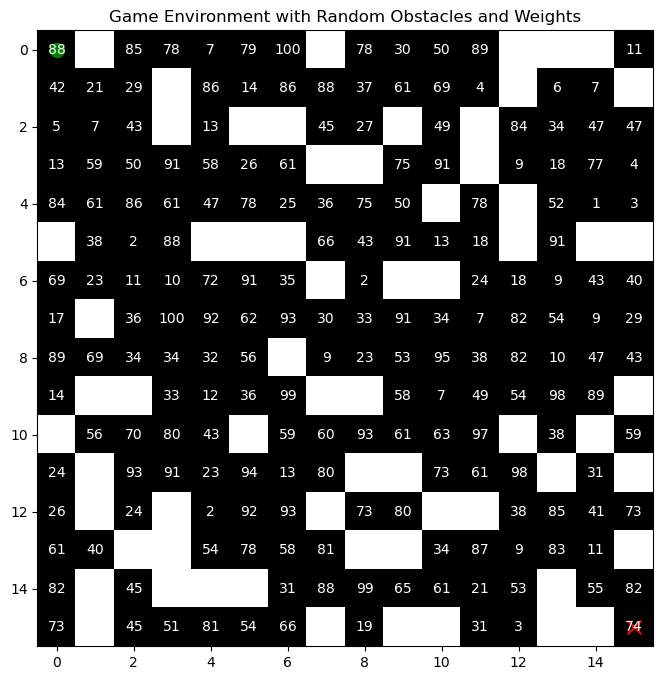

In [99]:
# Define the game environment with random obstacles
grid_size = (16, 16)  # Increase the grid size
obstacle_density = 0.3  # Adjust the obstacle density as needed
grid = np.zeros(grid_size)
random_numbers = np.zeros(grid_size)  # Store random numbers for each cell

# Add random obstacles and numbers to the grid
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if random.random() < obstacle_density:
            grid[i, j] = 1
        else:
            random_numbers[i, j] = random.randint(1, 100)

# Visualize the grid with obstacles and numbers
plt.figure(figsize=(8, 8))  # Adjust the figure size
plt.imshow(grid, cmap='gray', origin='upper', interpolation='none', vmin=0, vmax=1)

# Mark the start and goal points (optional)
start_point = (0, 0)
goal_point = (grid_size[0] - 1, grid_size[1] - 1)

# Mark the start and goal points
plt.scatter(*start_point, color='green', marker='o', s=100, label='Start')
plt.scatter(*goal_point, color='red', marker='x', s=100, label='Goal')

# Add random numbers as text on each walkable box
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if grid[i, j] == 0:
            plt.text(j, i, str(int(random_numbers[i, j])), ha='center', va='center', color='white')

plt.title('Game Environment with Random Obstacles and Weights')
plt.show()


This cell calls the A* algorithm to find the optimal path from the start to the goal in the defined grid.

In [100]:
# Find both the weighted and non-weighted optimal paths using A*
weighted_optimal_path, _, _, _ = astar(start_point, goal_point, grid)
shortest_path_least_steps, _ = astar_least_steps(start_point, goal_point, grid)
# u will see random bs here ignore

Total cost = 0.0 + 42.0 + 5.0 + 7.0 + 59.0 + 61.0 + 38.0 + 2.0 + 11.0 + 10.0 + 72.0 + 91.0 + 35.0 + 93.0 + 30.0 + 9.0 + 23.0 + 53.0 + 58.0 + 7.0 + 63.0 + 73.0 + 61.0 + 98.0 + 38.0 + 9.0 + 83.0 + 11.0 + 55.0 + 82.0 + 74.0  
           = 1441.0
Number of steps: 180
Total cost = 1601.0
Number of steps: 30


This cell visualizes the grid, the start and goal points, and the optimal path using Matplotlib. The figure size is adjusted for better visibility. Green represents the start point, red represents the goal point, and blue represents the optimal path on the grid with obstacles.

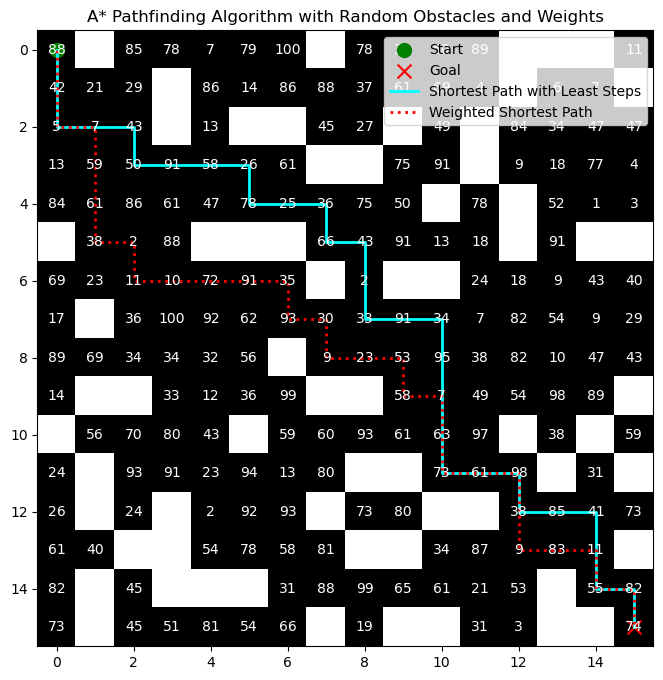

In [101]:
# Cell 8
# Visualize the grid and the optimal paths with adjusted figure size
plt.figure(figsize=(8, 8))  # Adjust the figure size
plt.imshow(grid, cmap='gray', origin='upper', interpolation='none', vmin=0, vmax=1)

# Mark the start and goal points
plt.scatter(*start_point, color='green', marker='o', s=100, label='Start')
plt.scatter(*goal_point, color='red', marker='x', s=100, label='Goal')

# Plot the shortest path with least steps in yellow
shortest_path_least_steps_x, shortest_path_least_steps_y = zip(*shortest_path_least_steps)
plt.plot(shortest_path_least_steps_y, shortest_path_least_steps_x, color='aqua', linewidth=2, label='Shortest Path with Least Steps')

# Plot the weighted optimal path in blue
optimal_path_x, optimal_path_y = zip(*weighted_optimal_path)
plt.plot(optimal_path_y, optimal_path_x, color='red', linestyle='dotted', linewidth=2, label='Weighted Shortest Path')

# Add random numbers as text on each walkable box using stored values
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if grid[i, j] == 0:
            plt.text(j, i, str(int(random_numbers[i, j])), ha='center', va='center', color='white')

plt.legend()
plt.title('A* Pathfinding Algorithm with Random Obstacles and Weights')
plt.show()




new stuff

In [58]:
# Updated Cell 2
# Define the A* pathfinding algorithm with least steps priority
def astar_least_steps(start, goal, grid):
    rows, cols = len(grid), len(grid[0])
    open_set = [(0, start)]
    came_from = {}
    cost_so_far = {start: 0}
    all_paths = []  # Track all paths explored
    path = []  # Initialize the path variable

    while open_set:
        current_cost, current_node = heappop(open_set)

        if current_node == goal:
            # Store the full path
            path = reconstruct_path(came_from, start, goal)
            all_paths.append(path)

            # Print total cost before returning
            total_cost = sum(random_numbers[node[0], node[1]] for node in path)  # Calculate total cost
            print(f'Total cost = {total_cost}')
            print(f"Number of steps: {len(path) - 1}")  # Subtract 1 to get the number of steps
            return path, all_paths

        for neighbor in neighbors(current_node, rows, cols, grid):
            new_cost = cost_so_far[current_node] + 1  # Each step has a cost of 1

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = len(path) + heuristic(goal, neighbor)  # Use total steps + heuristic as priority
                heappush(open_set, (priority, neighbor))
                came_from[neighbor] = current_node
                path = reconstruct_path(came_from, start, neighbor)  # Update the path

    print("No path found.")
    return [], all_paths


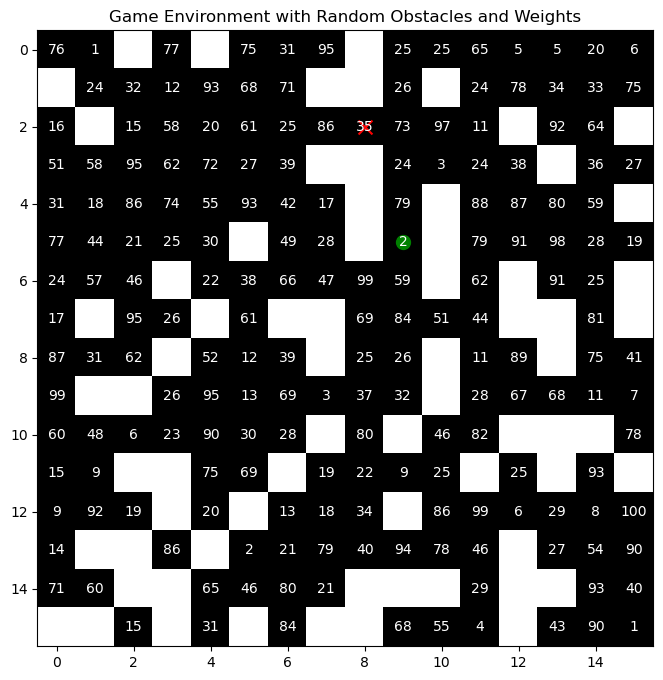

In [84]:
# Cell 7
# Define the game environment with random obstacles
grid_size = (16, 16)  # Increase the grid size
obstacle_density = 0.3  # Adjust the obstacle density as needed
grid = np.zeros(grid_size)
random_numbers = np.zeros(grid_size)  # Store random numbers for each cell

# Add random obstacles and numbers to the grid
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if random.random() < obstacle_density:
            grid[i, j] = 1
        else:
            random_numbers[i, j] = random.randint(1, 100)

# Find random walkable positions for start and end points
walkable_positions = [(i, j) for i in range(grid_size[0]) for j in range(grid_size[1]) if grid[i, j] == 0]

# Randomly select start and end points from walkable positions
start_point = random.choice(walkable_positions)
walkable_positions.remove(start_point)  # Remove start point from walkable positions

# Ensure the end point is on a different walkable position
end_point = random.choice(walkable_positions)

# Visualize the grid with obstacles and numbers
plt.figure(figsize=(8, 8))  # Adjust the figure size
plt.imshow(grid, cmap='gray', origin='upper', interpolation='none', vmin=0, vmax=1)

# Mark the start and goal points
plt.scatter(*start_point, color='green', marker='o', s=100, label='Start')
plt.scatter(*end_point, color='red', marker='x', s=100, label='Goal')

# Add random numbers as text on each walkable box
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if grid[i, j] == 0:
            plt.text(j, i, str(int(random_numbers[i, j])), ha='center', va='center', color='white')

plt.title('Game Environment with Random Obstacles and Weights')
plt.show()



In [85]:
# Cell 8
# Find both the weighted and non-weighted optimal paths using A*
weighted_optimal_path, _, _, _ = astar(start_point, end_point, grid)
shortest_path_least_steps, _ = astar_least_steps(start_point, end_point, grid)

Total cost = 0.0 + 12.0 + 61.0 + 38.0 + 22.0 + 30.0 + 25.0 + 21.0 + 46.0 + 95.0 + 62.0  
           = 425.0
Number of steps: 118
Total cost = 425.0
Number of steps: 10


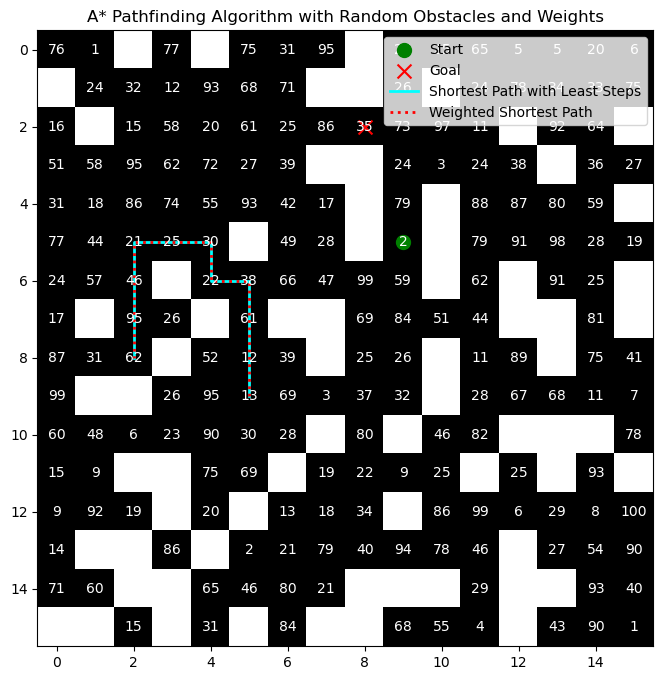

In [86]:
# Cell 9
# Visualize the grid and the optimal paths with adjusted figure size
plt.figure(figsize=(8, 8))  # Adjust the figure size
plt.imshow(grid, cmap='gray', origin='upper', interpolation='none', vmin=0, vmax=1)

# Mark the start and goal points
plt.scatter(*start_point, color='green', marker='o', s=100, label='Start')
plt.scatter(*end_point, color='red', marker='x', s=100, label='Goal')

# Plot the shortest path with least steps in yellow
shortest_path_least_steps_x, shortest_path_least_steps_y = zip(*shortest_path_least_steps)
plt.plot(shortest_path_least_steps_y, shortest_path_least_steps_x, color='aqua', linewidth=2, label='Shortest Path with Least Steps')

# Plot the weighted optimal path in blue
optimal_path_x, optimal_path_y = zip(*weighted_optimal_path)
plt.plot(optimal_path_y, optimal_path_x, color='red', linestyle='dotted', linewidth=2, label='Weighted Shortest Path')

# Add random numbers as text on each walkable box using stored values
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if grid[i, j] == 0:
            plt.text(j, i, str(int(random_numbers[i, j])), ha='center', va='center', color='white')

plt.legend()
plt.title('A* Pathfinding Algorithm with Random Obstacles and Weights')
plt.show()